## Problema:
O objetivo desta análise consiste em prever a probabilidade de churn dos clientes de uma empresa de telecomunicações, isto é, a probabilidade de o cliente deixar de ser cliente.

## Controle de versões
1. Versão: Seleção de variáveis - uso de variaveis selecionadas no modelo <br>
Score: 0.77840 <br>
2. Versão: Uso de todas as variáveis no modelo<br>
Score: 0.78977  MELHOR SCORE ATÉ O MOMENTO !

## Configuração do ambiente

In [1]:
from platform import python_version
print(python_version())

3.7.3


## Obtenção dos dados

### Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 72)

### Carregamento dos dados

In [3]:
dados = pd.read_csv('train.csv',sep=',')

### Visualização das linhas iniciais de dados

In [4]:
dados.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,nan,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


## Manipulação inicial do banco de dados

### Renomeando o banco de dados

In [5]:
dados = dados.rename(columns={
    'id':'id',
    'gender':'genero',
    'SeniorCitizen':'Idoso',
    'Partner':'TemParceiro',
    'Dependents':'TemDependentes',
    'tenure':'MesesNaCompanhia',
    'PhoneService':'TemTelefone',
    'MultipleLines':'MaisLinhas',
    'InternetService':'TemInternet',
    'OnlineSecurity':'ServicoSegurancaOnline',
    'OnlineBackup':'ServicoBackupOnline',
    'DeviceProtection':'ServicoProtecaoOnline',
    'TechSupport':'ServicoSuporteOnline',
    'StreamingTV':'ServicoTV',
    'StreamingMovies':'ServicoPctFilmes',
    'Contract':'Contrato',
    'PaperlessBilling':'ContaOnline',
    'PaymentMethod':'MetodoPagamento',
    'MonthlyCharges':'CobrancaMensal',
    'TotalCharges':'CobrancaTotal',
    'Churn':'Churn'
})

### Visualizando o banco de dados

In [6]:
# Exporta dados para Excel
dados.to_excel('train2.xlsx')

In [7]:
dados.head(10).T  #.T faz a transposta da exibiçao do comando head

,0,1,2,3,4,5,6,7,8,9
id,4030,6731,6479,6861,3266,6368,5830,4476,1508,2921
genero,Female,Male,Female,Female,Male,Male,Male,Female,Male,Female
Idoso,0,0,0,0,0,0,0,0,0,0
TemParceiro,No,Yes,Yes,No,Yes,No,Yes,No,No,Yes
TemDependentes,No,Yes,No,No,Yes,No,Yes,No,No,No
MesesNaCompanhia,56.00,NaN,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00
TemTelefone,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes
MaisLinhas,No phone service,No,Yes,Yes,No,No phone service,No phone service,No,No,No
TemInternet,DSL,No,Fiber optic,Fiber optic,Fiber optic,DSL,DSL,No,No,DSL
ServicoSegurancaOnline,Yes,No internet service,No,No,No,Yes,Yes,No internet service,No internet service,Yes


### Verificando os tipos de dados

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
id                        5634 non-null int64
genero                    5634 non-null object
Idoso                     5634 non-null int64
TemParceiro               5634 non-null object
TemDependentes            5416 non-null object
MesesNaCompanhia          5173 non-null float64
TemTelefone               5634 non-null object
MaisLinhas                5634 non-null object
TemInternet               5634 non-null object
ServicoSegurancaOnline    5634 non-null object
ServicoBackupOnline       5634 non-null object
ServicoProtecaoOnline     5634 non-null object
ServicoSuporteOnline      5634 non-null object
ServicoTV                 5634 non-null object
ServicoPctFilmes          5634 non-null object
Contrato                  5634 non-null object
ContaOnline               5634 non-null object
MetodoPagamento           5535 non-null object
CobrancaMensal            5634 non-null float64


## EDA - Análise Exploratória de Dados

### Separando as variáveis por tipo

In [9]:
quantitativas = dados[['MesesNaCompanhia','CobrancaMensal','CobrancaTotal']]
categóricas = dados.drop(columns=['id','MesesNaCompanhia','CobrancaMensal','CobrancaTotal','Churn'],
                         axis=1)
target = dados['Churn']

In [10]:
quantitativas.head()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
0,56.00,45.05,2560.1
1,nan,19.65,332.65
2,60.00,110.80,6640.7
3,37.00,101.90,3545.35
4,29.00,70.75,1974.8


In [11]:
categóricas.head()

,genero,Idoso,TemParceiro,TemDependentes,TemTelefone,MaisLinhas,TemInternet,ServicoSegurancaOnline,ServicoBackupOnline,ServicoProtecaoOnline,ServicoSuporteOnline,ServicoTV,ServicoPctFilmes,Contrato,ContaOnline,MetodoPagamento
0,Female,0,No,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN
1,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
2,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
3,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
4,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [12]:
target.head()

0    0
1    0
2    0
3    1
4    1
Name: Churn, dtype: int64

### Variáveis quantitativas

#### Verificação dos tipos de dados das variáveis quantitativas

In [13]:
quantitativas.dtypes

MesesNaCompanhia    float64
CobrancaMensal      float64
CobrancaTotal        object
dtype: object

#### Correção da variável 'CobrançaTotal'
Essa variável é quantitativa, mas foi importada como sendo do tipo Object. <br>
Portanto, precisa ser alterada para o tipo numerico.

In [14]:
import pandas

In [15]:
dados['CobrancaTotal'] = pd.to_numeric(dados['CobrancaTotal'], errors='coerce')
quantitativas['CobrancaTotal'] = pd.to_numeric(quantitativas['CobrancaTotal'], errors='coerce')

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Verificação dos tipos de dados.
Verifica-se que CobrançaTotal foi corrigida.

In [16]:
quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 3 columns):
MesesNaCompanhia    5173 non-null float64
CobrancaMensal      5634 non-null float64
CobrancaTotal       5626 non-null float64
dtypes: float64(3)
memory usage: 132.1 KB


#### Sumário estatístico das variáveis quantitativas

In [17]:
quantitativas.describe()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
count,"5,173.00","5,634.00","5,626.00"
mean,32.33,64.63,"2,273.51"
std,24.46,30.02,"2,258.38"
min,0.00,18.25,18.80
25%,9.00,35.46,401.59
50%,29.00,70.25,"1,396.12"
75%,55.00,89.80,"3,764.29"
max,72.00,118.75,"8,684.80"


#### Boxplot

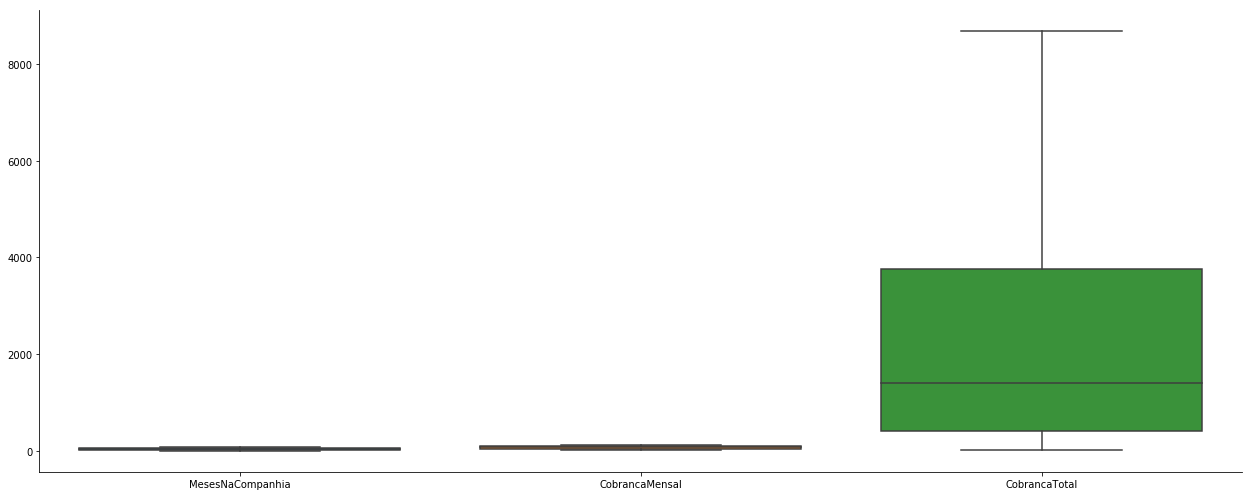

In [18]:
sns.catplot(data=quantitativas,
              kind='box',
              height=7,
              aspect=2.5)

#### Verificação dos missing values das variáveis quantitativas

In [19]:
quantitativas.isnull().sum()

MesesNaCompanhia    461
CobrancaMensal        0
CobrancaTotal         8
dtype: int64

#### Variável quantitativa 'CobrancaMernsal'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202D877E8D0>]],
      dtype=object)

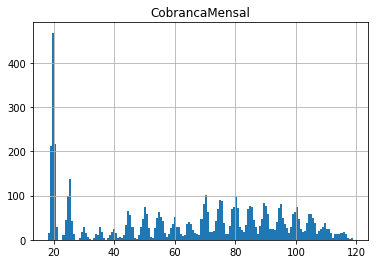

In [20]:
quantitativas[['CobrancaMensal']].hist(bins=150)

In [21]:
quantitativas[['CobrancaMensal']].mode()

,CobrancaMensal
0,20.05


In [22]:
quantitativas[['CobrancaMensal']].describe()

,CobrancaMensal
count,"5,634.00"
mean,64.63
std,30.02
min,18.25
25%,35.46
50%,70.25
75%,89.80
max,118.75


In [23]:
# Coeficiente de variação
quantitativas[['CobrancaMensal']].std()/quantitativas[['CobrancaMensal']].mean()*100

CobrancaMensal   46.45
dtype: float64

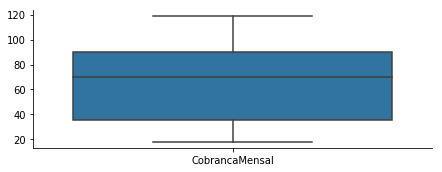

In [24]:
sns.catplot(data=quantitativas[['CobrancaMensal']],
              kind='box',
              height=2.5,
              aspect=2.5)

#### Variável quantitativa 'CobrancaTotal'

In [25]:
quantitativas[['CobrancaTotal']].describe()

,CobrancaTotal
count,"5,626.00"
mean,"2,273.51"
std,"2,258.38"
min,18.80
25%,401.59
50%,"1,396.12"
75%,"3,764.29"
max,"8,684.80"


In [26]:
# Coeficiente de variação
quantitativas[['CobrancaTotal']].std() / quantitativas[['CobrancaTotal']].mean() * 100

CobrancaTotal   99.33
dtype: float64

In [27]:
quantitativas[['CobrancaTotal']].mode()

,CobrancaTotal
0,20.20


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202D8BE72E8>]],
      dtype=object)

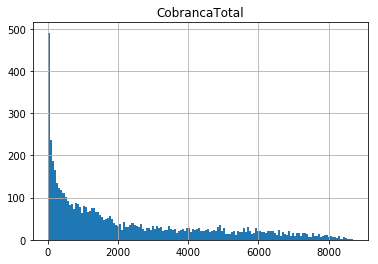

In [28]:
quantitativas[['CobrancaTotal']].hist(bins=150)

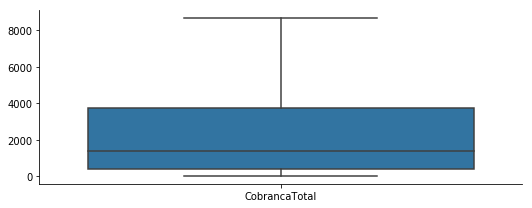

In [29]:
sns.catplot(data=quantitativas[['CobrancaTotal']],
              kind='box',
              height=3,
              aspect=2.5)

In [30]:
# Criou a coluna CobrancaTotal_2 e a preencheu os nans com a moda. Acho que seria melhor usa os valores da CobrancaMensal 
# (vide as 2 próximas células)

quantitativas['CobrancaTotal_2'] = quantitativas['CobrancaTotal'].fillna(quantitativas['CobrancaTotal'].mode()[0])

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
# FBR: Ver os registros vazios na coluna cobrança total:

quantitativas['CobrancaMensal'][quantitativas['CobrancaTotal'].isnull()]

161    61.90
416    19.70
1766   73.35
2145   80.85
3375   25.35
3404   25.75
4008   19.85
5151   56.05
Name: CobrancaMensal, dtype: float64

In [32]:
# FBR: Ver os registros vazios na coluna cobrança total:

quantitativas[quantitativas['CobrancaTotal'].isnull()]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal_2
161,0.00,61.90,nan,20.20
416,0.00,19.70,nan,20.20
1766,0.00,73.35,nan,20.20
2145,0.00,80.85,nan,20.20
3375,0.00,25.35,nan,20.20
3404,0.00,25.75,nan,20.20
4008,0.00,19.85,nan,20.20
5151,0.00,56.05,nan,20.20


In [33]:
quantitativas[['CobrancaTotal_2']].isnull().any()

CobrancaTotal_2    False
dtype: bool

#### Variável quantitativa 'MesesNaCompanhia'

In [34]:
quantitativas.head(23).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
MesesNaCompanhia,56.00,nan,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00,6.00,nan,7.00,1.00,72.00,19.00,8.00,72.00,4.00,38.00,17.00,25.00,70.00
CobrancaMensal,45.05,19.65,110.80,101.90,70.75,48.40,59.95,19.55,19.65,85.10,18.95,94.90,66.85,69.80,84.45,69.60,43.45,90.45,76.05,81.85,44.45,61.60,57.80
CobrancaTotal,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80","3,442.80","1,848.80",61.05,"1,008.70","6,155.40",110.15,"4,422.95",458.10,69.80,"6,033.10","1,394.55",345.50,"6,565.85",318.90,"3,141.70",792.15,"1,611.00","4,039.30"
CobrancaTotal_2,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80","3,442.80","1,848.80",61.05,"1,008.70","6,155.40",110.15,"4,422.95",458.10,69.80,"6,033.10","1,394.55",345.50,"6,565.85",318.90,"3,141.70",792.15,"1,611.00","4,039.30"


In [35]:
# Cria a coluna 'RazaoCobrTotalMensal'para contabilizar a razão entre a Cobrança Total e a Mensal:
quantitativas['RazaoCobrTotalMensal'] = quantitativas['CobrancaTotal']/quantitativas['CobrancaMensal']

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
# Cria a coluna 'DiferencapercRazaoCobrTotMensal' para registrar a diferença entre a RazaoCobTotalMensal e a qtde de
# meses na companhia.
quantitativas['DiferencapercRazaoCobrTotMensal'] = (quantitativas['MesesNaCompanhia']-quantitativas['RazaoCobrTotalMensal'])/quantitativas['MesesNaCompanhia']
quantitativas.describe()

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal_2,RazaoCobrTotalMensal,DiferencapercRazaoCobrTotMensal
count,"5,173.00","5,634.00","5,626.00","5,634.00","5,626.00","5,165.00"
mean,32.33,64.63,"2,273.51","2,270.31",32.40,-0.00
std,24.46,30.02,"2,258.38","2,258.37",24.53,0.05
min,0.00,18.25,18.80,18.80,1.00,-0.57
25%,9.00,35.46,401.59,399.30,8.82,-0.02
50%,29.00,70.25,"1,396.12","1,392.92",28.85,0.00
75%,55.00,89.80,"3,764.29","3,758.40",54.98,0.02
max,72.00,118.75,"8,684.80","8,684.80",79.34,0.31


Verifica-se que a razão entre os valores das variáveis CobrancaTotal e CobrancaMensal é um bom indicador<br>
do valor da variável MesesNaCompanhia. Dessa forma, vamos usar essa razão para preencher os valores faltantes <br>
da variável 'MesesNaCompanhia'.

In [37]:
quantitativas.head(23).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
MesesNaCompanhia,56.00,nan,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00,6.00,nan,7.00,1.00,72.00,19.00,8.00,72.00,4.00,38.00,17.00,25.00,70.00
CobrancaMensal,45.05,19.65,110.80,101.90,70.75,48.40,59.95,19.55,19.65,85.10,18.95,94.90,66.85,69.80,84.45,69.60,43.45,90.45,76.05,81.85,44.45,61.60,57.80
CobrancaTotal,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80","3,442.80","1,848.80",61.05,"1,008.70","6,155.40",110.15,"4,422.95",458.10,69.80,"6,033.10","1,394.55",345.50,"6,565.85",318.90,"3,141.70",792.15,"1,611.00","4,039.30"
CobrancaTotal_2,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80","3,442.80","1,848.80",61.05,"1,008.70","6,155.40",110.15,"4,422.95",458.10,69.80,"6,033.10","1,394.55",345.50,"6,565.85",318.90,"3,141.70",792.15,"1,611.00","4,039.30"
RazaoCobrTotalMensal,56.83,16.93,59.93,34.79,27.91,71.13,30.84,3.12,51.33,72.33,5.81,46.61,6.85,1.00,71.44,20.04,7.95,72.59,4.19,38.38,17.82,26.15,69.88
DiferencapercRazaoCobrTotMensal,-0.01,nan,0.00,0.06,0.04,-0.02,0.01,-0.04,0.05,-0.00,0.03,nan,0.02,0.00,0.01,-0.05,0.01,-0.01,-0.05,-0.01,-0.05,-0.05,0.00


In [38]:
quantitativas = quantitativas.drop(columns=['RazaoCobrTotalMensal','DiferencapercRazaoCobrTotMensal'],
                   axis=1)

In [39]:
quantitativas.head().T

,0,1,2,3,4
MesesNaCompanhia,56.00,nan,60.00,37.00,29.00
CobrancaMensal,45.05,19.65,110.80,101.90,70.75
CobrancaTotal,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80"
CobrancaTotal_2,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80"


In [40]:
quantitativas['MesesNaCompanhia_2']  = quantitativas['MesesNaCompanhia'].fillna(quantitativas['CobrancaTotal']/
                                                                               quantitativas['CobrancaMensal'])

In [57]:
quantitativas.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
MesesNaCompanhia,56.00,nan,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00,6.00,nan,7.00,1.00,72.00,19.00,8.00,72.00,4.00,38.00
CobrancaMensal,45.05,19.65,110.80,101.90,70.75,48.40,59.95,19.55,19.65,85.10,18.95,94.90,66.85,69.80,84.45,69.60,43.45,90.45,76.05,81.85
CobrancaTotal,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80","3,442.80","1,848.80",61.05,"1,008.70","6,155.40",110.15,"4,422.95",458.10,69.80,"6,033.10","1,394.55",345.50,"6,565.85",318.90,"3,141.70"
CobrancaTotal_2,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80","3,442.80","1,848.80",61.05,"1,008.70","6,155.40",110.15,"4,422.95",458.10,69.80,"6,033.10","1,394.55",345.50,"6,565.85",318.90,"3,141.70"
MesesNaCompanhia_2,56.00,16.93,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00,6.00,46.61,7.00,1.00,72.00,19.00,8.00,72.00,4.00,38.00


In [42]:
quantitativas_2 = quantitativas[['CobrancaMensal','CobrancaTotal_2','MesesNaCompanhia_2']]

In [43]:
quantitativas_2.isnull().sum()

CobrancaMensal        0
CobrancaTotal_2       0
MesesNaCompanhia_2    0
dtype: int64

### Discretização das variáveis quantitativas

In [46]:
quantitativas_2.nunique()

CobrancaMensal        1505
CobrancaTotal_2       5285
MesesNaCompanhia_2     490
dtype: int64

In [47]:
from sklearn.preprocessing import KBinsDiscretizer

In [48]:
discretizer = KBinsDiscretizer(n_bins=5,
                              encode='ordinal',
                              strategy='quantile')

In [49]:
discretizer.fit(quantitativas_2)

KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='quantile')

In [60]:
bining = discretizer.fit_transform(quantitativas_2)

array([[1., 3., 3.],
       [0., 1., 1.],
       [4., 4., 4.],
       ...,
       [1., 2., 2.],
       [1., 2., 4.],
       [4., 3., 2.]])

In [51]:
quantitativas_bining = pd.DataFrame(bining,
                                    columns=['CobrancaMensal',
                                             'CobrancaTotal_2',
                                             'MesesNaCompanhia_2'])

In [59]:
quantitativas_bining.head(30).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
CobrancaMensal,1.00,0.00,4.00,4.00,2.00,1.00,2.00,0.00,0.00,3.00,0.00,4.00,2.00,2.00,3.00,2.00,1.00,3.00,2.00,3.00,1.00,2.00,1.00,2.00,1.00,3.00,1.00,2.00,4.00,0.00
CobrancaTotal_2,3.00,1.00,4.00,3.00,2.00,3.00,2.00,0.00,2.00,4.00,0.00,3.00,1.00,0.00,4.00,2.00,1.00,4.00,1.00,3.00,1.00,2.00,3.00,3.00,3.00,4.00,3.00,3.00,4.00,1.00
MesesNaCompanhia_2,3.00,1.00,4.00,2.00,2.00,4.00,2.00,0.00,3.00,4.00,1.00,3.00,1.00,0.00,4.00,1.00,1.00,4.00,0.00,2.00,1.00,2.00,4.00,3.00,4.00,4.00,3.00,4.00,4.00,1.00


### Variáveis categóricas

In [53]:
categóricas.head()

,genero,Idoso,TemParceiro,TemDependentes,TemTelefone,MaisLinhas,TemInternet,ServicoSegurancaOnline,ServicoBackupOnline,ServicoProtecaoOnline,ServicoSuporteOnline,ServicoTV,ServicoPctFilmes,Contrato,ContaOnline,MetodoPagamento
0,Female,0,No,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN
1,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
2,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
3,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
4,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [54]:
categóricas.isna().sum()

genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
dtype: int64

#### Contagem de valores da variavel genero

In [55]:
categóricas['genero'].value_counts()

Male      2849
Female    2785
Name: genero, dtype: int64

#### Tabela de frequencias Churn x genero

In [61]:
# Table of survival vs. sex
Churn_genero = pd.crosstab(index=dados["Churn"], 
                           columns=dados["genero"],
                          margins=True)

Churn_genero.columns=['Female','Male',"rowtotal"]
Churn_genero.index= ["0","1","coltotal"]

Churn_genero

,Female,Male,rowtotal
0,2045,2094,4139
1,740,755,1495
coltotal,2785,2849,5634


In [62]:
Churn_genero/Churn_genero.loc["coltotal","rowtotal"]

,Female,Male,rowtotal
0,0.36,0.37,0.73
1,0.13,0.13,0.27
coltotal,0.49,0.51,1.00


#Temos missing values em duas variáveis categóricas:
#'TemDependentes'        categórica
#'MetodoPagamento'    categórica

#### Imputação de missing values na variável 'TemDependente'
Como 'TemDependentes' é uma variável categórica, criaremos uma nova categoria, chamada 'Miss', a qual será imputada a todos os missing values dessa variável.

In [71]:
# Não entendi o critério 'Miss'
categóricas['TemDependentes'] = categóricas['TemDependentes'].fillna(categóricas['TemDependentes']=='Miss')

In [72]:
categóricas['TemDependentes'].isnull().any()

False

#### Imputação de missing values na variável 'MetodoPagamento'

In [75]:
categóricas['MetodoPagamento'] = categóricas['MetodoPagamento'].fillna(categóricas['MetodoPagamento']=='Miss')


In [76]:
categóricas['MetodoPagamento'].isnull().any()

False

In [77]:
categóricas.isnull().sum()

genero                    0
Idoso                     0
TemParceiro               0
TemDependentes            0
TemTelefone               0
MaisLinhas                0
TemInternet               0
ServicoSegurancaOnline    0
ServicoBackupOnline       0
ServicoProtecaoOnline     0
ServicoSuporteOnline      0
ServicoTV                 0
ServicoPctFilmes          0
Contrato                  0
ContaOnline               0
MetodoPagamento           0
dtype: int64

In [78]:
dados['MetodoPagamento'].value_counts()

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: MetodoPagamento, dtype: int64

## Verificação da cardinalidade das variaveis categoricas
Como todas as variáveis categóricas têm baixa cardinalidade (quantidade de valores únicos menor que 10), vamos criar variáveis dummy para todas.

In [79]:
categóricas.nunique()

genero                    2
Idoso                     2
TemParceiro               2
TemDependentes            3
TemTelefone               2
MaisLinhas                3
TemInternet               3
ServicoSegurancaOnline    3
ServicoBackupOnline       3
ServicoProtecaoOnline     3
ServicoSuporteOnline      3
ServicoTV                 3
ServicoPctFilmes          3
Contrato                  3
ContaOnline               2
MetodoPagamento           5
dtype: int64

In [80]:
dummies = pd.get_dummies(categóricas,
                        prefix_sep='_',
                        drop_first=True)

In [81]:
dummies.head()

,Idoso,genero_Male,TemParceiro_Yes,TemDependentes_No,TemDependentes_Yes,TemTelefone_Yes,MaisLinhas_No phone service,MaisLinhas_Yes,TemInternet_Fiber optic,TemInternet_No,ServicoSegurancaOnline_No internet service,ServicoSegurancaOnline_Yes,ServicoBackupOnline_No internet service,ServicoBackupOnline_Yes,ServicoProtecaoOnline_No internet service,ServicoProtecaoOnline_Yes,ServicoSuporteOnline_No internet service,ServicoSuporteOnline_Yes,ServicoTV_No internet service,ServicoTV_Yes,ServicoPctFilmes_No internet service,ServicoPctFilmes_Yes,Contrato_One year,Contrato_Two year,ContaOnline_Yes,MetodoPagamento_Bank transfer (automatic),MetodoPagamento_Credit card (automatic),MetodoPagamento_Electronic check,MetodoPagamento_Mailed check
0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,1,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
2,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0
3,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0
4,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [82]:
dummies['Idoso'].unique()

array([0, 1], dtype=int64)

In [83]:
dummies.columns

Index(['Idoso', 'genero_Male', 'TemParceiro_Yes', 'TemDependentes_No',
       'TemDependentes_Yes', 'TemTelefone_Yes', 'MaisLinhas_No phone service',
       'MaisLinhas_Yes', 'TemInternet_Fiber optic', 'TemInternet_No',
       'ServicoSegurancaOnline_No internet service',
       'ServicoSegurancaOnline_Yes', 'ServicoBackupOnline_No internet service',
       'ServicoBackupOnline_Yes', 'ServicoProtecaoOnline_No internet service',
       'ServicoProtecaoOnline_Yes', 'ServicoSuporteOnline_No internet service',
       'ServicoSuporteOnline_Yes', 'ServicoTV_No internet service',
       'ServicoTV_Yes', 'ServicoPctFilmes_No internet service',
       'ServicoPctFilmes_Yes', 'Contrato_One year', 'Contrato_Two year',
       'ContaOnline_Yes', 'MetodoPagamento_Bank transfer (automatic)',
       'MetodoPagamento_Credit card (automatic)',
       'MetodoPagamento_Electronic check', 'MetodoPagamento_Mailed check'],
      dtype='object')

## Formação dos bancos de dados explicativas e target

In [84]:
explicativas=pd.concat([quantitativas_bining,dummies],
                      axis=1)

In [85]:
explicativas.columns

Index(['CobrancaMensal', 'CobrancaTotal_2', 'MesesNaCompanhia_2', 'Idoso',
       'genero_Male', 'TemParceiro_Yes', 'TemDependentes_No',
       'TemDependentes_Yes', 'TemTelefone_Yes', 'MaisLinhas_No phone service',
       'MaisLinhas_Yes', 'TemInternet_Fiber optic', 'TemInternet_No',
       'ServicoSegurancaOnline_No internet service',
       'ServicoSegurancaOnline_Yes', 'ServicoBackupOnline_No internet service',
       'ServicoBackupOnline_Yes', 'ServicoProtecaoOnline_No internet service',
       'ServicoProtecaoOnline_Yes', 'ServicoSuporteOnline_No internet service',
       'ServicoSuporteOnline_Yes', 'ServicoTV_No internet service',
       'ServicoTV_Yes', 'ServicoPctFilmes_No internet service',
       'ServicoPctFilmes_Yes', 'Contrato_One year', 'Contrato_Two year',
       'ContaOnline_Yes', 'MetodoPagamento_Bank transfer (automatic)',
       'MetodoPagamento_Credit card (automatic)',
       'MetodoPagamento_Electronic check', 'MetodoPagamento_Mailed check'],
      dtype='object'

In [86]:
#explicativas.drop(['id'],axis=1,inplace=True)
explicativas.head()

,CobrancaMensal,CobrancaTotal_2,MesesNaCompanhia_2,Idoso,genero_Male,TemParceiro_Yes,TemDependentes_No,TemDependentes_Yes,TemTelefone_Yes,MaisLinhas_No phone service,MaisLinhas_Yes,TemInternet_Fiber optic,TemInternet_No,ServicoSegurancaOnline_No internet service,ServicoSegurancaOnline_Yes,ServicoBackupOnline_No internet service,ServicoBackupOnline_Yes,ServicoProtecaoOnline_No internet service,ServicoProtecaoOnline_Yes,ServicoSuporteOnline_No internet service,ServicoSuporteOnline_Yes,ServicoTV_No internet service,ServicoTV_Yes,ServicoPctFilmes_No internet service,ServicoPctFilmes_Yes,Contrato_One year,Contrato_Two year,ContaOnline_Yes,MetodoPagamento_Bank transfer (automatic),MetodoPagamento_Credit card (automatic),MetodoPagamento_Electronic check,MetodoPagamento_Mailed check
0,1.00,3.00,3.00,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.00,1.00,1.00,0,1,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
2,4.00,4.00,4.00,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0
3,4.00,3.00,2.00,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0
4,2.00,2.00,2.00,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [87]:
target.head()

0    0
1    0
2    0
3    1
4    1
Name: Churn, dtype: int64

## Separação dos conjuntos de treino e teste

In [88]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(explicativas,
                                                       target,
                                                       test_size=0.3,
                                                      random_state=42)

## Tuninng de hiperparâmetros
Inicialmente, chamar o módulo de tuning.<br>
Passo a passo <br>
1 - definir um dict(dicionario com os valores dos hiperparams)<br>
2 - chamar o modulo de tunning<br>
3 - chamar obj do tunning<br>
4 - treinamento<br>
5 - avaliar os resultados

### Chamar o módulo de Tuning

In [89]:
from sklearn.model_selection import  GridSearchCV

### Chamar módulo de acurácia

In [90]:
from sklearn.metrics import accuracy_score

### Random Forest

In [91]:
import timeit

In [92]:
#1
rf_dict = {                            # nome do dicionário que está sendo criado.
    'n_estimators':[40,50,60,70],   # numero de estimadores que será testado. Quanto maior, mais exige poder computacional.
    'criterion':['gini', 'entropy'],   #  critérios
    'bootstrap':[False, True],  # Faz amostragem com e sem reposição.
    'random_state': [42]
}


In [93]:
#2
from sklearn.ensemble import RandomForestClassifier


In [94]:
#3
rf = RandomForestClassifier(random_state=42)


In [95]:
rf_grid = GridSearchCV(estimator=rf,
                      param_grid=rf_dict,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1)


In [110]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [111]:
import joblib

In [97]:
rf_grid.fit(x_treino, y_treino)#.values.ravel()  colocar este comando depois de y_treino se precisar.

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [40, 50, 60, 70], 'criterion': ['gini', 'entropy'], 'bootstrap': [False, True], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [98]:
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'n_estimators': 40,
 'random_state': 42}

In [99]:
rf_grid.best_score_

0.7829064164341871

In [100]:
accuracy_score(y_teste, rf_grid.predict(x_teste))

0.7853341218214075

### Gradient Boosting

In [101]:
gb_dict = { 
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    'random_state': [1967]    
    }

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
gb = GradientBoostingClassifier(random_state=42)

In [104]:
gb_grid = GridSearchCV(estimator=gb,
                       param_grid=gb_dict,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1 # ACELERA O TEMPO DE PROCESSAMENTO
                      )

In [105]:
gb_grid.fit(x_treino,y_treino)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 8], 'max_features': ['log2', 'sqrt'], 'criterion': ['friedman_mse', 'mae'], 'random_state': [1967]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [106]:
gb_grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'log2',
 'random_state': 1967}

In [107]:
gb_grid.best_score_

0.809789500380421

In [108]:
gb_grid.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1967,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Salvar melhor modelo

In [112]:
import joblib

In [113]:
joblib.dump(gb_grid.best_estimator_,
            'modelo_exemplo_gb.pkl',
            compress=1)

['modelo_exemplo_gb.pkl']

### Score do grupo de teste

In [114]:
dados_teste = pd.read_csv('test.csv', sep=',')

In [115]:
dados_teste.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5027,Male,0,Yes,Yes,23.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,Male,1,Yes,Yes,61.00,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,Male,0,No,No,36.00,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,Female,0,Yes,Yes,61.00,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,Female,0,No,No,47.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [116]:
dados_teste = dados_teste.rename(columns={
    'id':'id',
    'gender':'genero',
    'SeniorCitizen':'Idoso',
    'Partner':'TemParceiro',
    'Dependents':'TemDependentes',
    'tenure':'MesesNaCompanhia',
    'PhoneService':'TemTelefone',
    'MultipleLines':'MaisLinhas',
    'InternetService':'TemInternet',
    'OnlineSecurity':'ServicoSegurancaOnline',
    'OnlineBackup':'ServicoBackupOnline',
    'DeviceProtection':'ServicoProtecaoOnline',
    'TechSupport':'ServicoSuporteOnline',
    'StreamingTV':'ServicoTV',
    'StreamingMovies':'ServicoPctFilmes',
    'Contract':'Contrato',
    'PaperlessBilling':'ContaOnline',
    'PaymentMethod':'MetodoPagamento',
    'MonthlyCharges':'CobrancaMensal',
    'TotalCharges':'CobrancaTotal'
})

In [117]:
quantitativas_teste = dados_teste[['MesesNaCompanhia','CobrancaMensal','CobrancaTotal']]
categóricas_teste = dados_teste.drop(columns=['id','MesesNaCompanhia','CobrancaMensal','CobrancaTotal'],
                         axis=1)

In [118]:
quantitativas_teste.head()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
0,23.00,20.00,445.3
1,61.00,99.00,5969.3
2,36.00,84.75,3050.15
3,61.00,61.45,3751.15
4,47.00,20.55,945.7


In [119]:
categóricas_teste.head()

,genero,Idoso,TemParceiro,TemDependentes,TemTelefone,MaisLinhas,TemInternet,ServicoSegurancaOnline,ServicoBackupOnline,ServicoProtecaoOnline,ServicoSuporteOnline,ServicoTV,ServicoPctFilmes,Contrato,ContaOnline,MetodoPagamento
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic)
1,Male,1,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN
2,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
3,Female,0,Yes,Yes,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check


In [120]:
quantitativas_teste['CobrancaTotal'] = pd.to_numeric(quantitativas_teste['CobrancaTotal'], errors='coerce')

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
quantitativas_teste.dtypes

MesesNaCompanhia    float64
CobrancaMensal      float64
CobrancaTotal       float64
dtype: object

In [122]:
quantitativas_teste.isnull().sum()

MesesNaCompanhia    118
CobrancaMensal        0
CobrancaTotal         3
dtype: int64

In [123]:
quantitativas_teste['CobrancaTotal_2'] = quantitativas_teste['CobrancaTotal'].fillna(quantitativas_teste['CobrancaTotal'].mode()[0])

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
quantitativas_teste[['CobrancaTotal_2']].isnull().any()

CobrancaTotal_2    False
dtype: bool

In [125]:
quantitativas_teste['MesesNaCompanhia_2']  = quantitativas_teste['MesesNaCompanhia'].fillna(quantitativas_teste['CobrancaTotal']/
                                                                               quantitativas_teste['CobrancaMensal'])

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [126]:
quantitativas_teste['MesesNaCompanhia_2'].isnull().any()

False

In [127]:
quantitativas_teste_2 = quantitativas_teste[['CobrancaMensal','CobrancaTotal_2','MesesNaCompanhia_2']]

In [128]:
quantitativas_teste_2.head()

,CobrancaMensal,CobrancaTotal_2,MesesNaCompanhia_2
0,20.00,445.30,23.00
1,99.00,"5,969.30",61.00
2,84.75,"3,050.15",36.00
3,61.45,"3,751.15",61.00
4,20.55,945.70,47.00


In [129]:
quantitativas_teste_2.isnull().sum()

CobrancaMensal        0
CobrancaTotal_2       0
MesesNaCompanhia_2    0
dtype: int64

In [130]:
discretizer_teste = KBinsDiscretizer(n_bins=5,
                              encode='ordinal',
                              strategy='quantile')

In [131]:
discretizer_teste.fit(quantitativas_teste_2)

KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='quantile')

In [132]:
bining_teste = discretizer_teste.fit_transform(quantitativas_teste_2)

In [133]:
quantitativas_teste_bining = pd.DataFrame(bining_teste,
                                    columns=['CobrancaMensal',
                                             'CobrancaTotal_2',
                                             'MesesNaCompanhia_2'])

In [134]:
quantitativas_teste_bining.head()

,CobrancaMensal,CobrancaTotal_2,MesesNaCompanhia_2
0,0.00,1.00,2.00
1,4.00,4.00,4.00
2,3.00,3.00,2.00
3,2.00,3.00,4.00
4,0.00,1.00,3.00


In [135]:
quantitativas_teste_bining.isnull().sum()

CobrancaMensal        0
CobrancaTotal_2       0
MesesNaCompanhia_2    0
dtype: int64

In [136]:
categóricas_teste.head()


,genero,Idoso,TemParceiro,TemDependentes,TemTelefone,MaisLinhas,TemInternet,ServicoSegurancaOnline,ServicoBackupOnline,ServicoProtecaoOnline,ServicoSuporteOnline,ServicoTV,ServicoPctFilmes,Contrato,ContaOnline,MetodoPagamento
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic)
1,Male,1,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN
2,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
3,Female,0,Yes,Yes,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check


In [137]:
categóricas_teste.isnull().sum()

genero                     0
Idoso                      0
TemParceiro                0
TemDependentes            41
TemTelefone                0
MaisLinhas                 0
TemInternet                0
ServicoSegurancaOnline     0
ServicoBackupOnline        0
ServicoProtecaoOnline      0
ServicoSuporteOnline       0
ServicoTV                  0
ServicoPctFilmes           0
Contrato                   0
ContaOnline                0
MetodoPagamento           30
dtype: int64

In [138]:
categóricas_teste['TemDependentes'] = categóricas_teste['TemDependentes'].fillna(categóricas_teste['TemDependentes']=='Miss')

In [139]:
categóricas_teste['MetodoPagamento'] = categóricas_teste['MetodoPagamento'].fillna(categóricas_teste['MetodoPagamento']=='Miss')

In [140]:
categóricas_teste.isnull().sum()

genero                    0
Idoso                     0
TemParceiro               0
TemDependentes            0
TemTelefone               0
MaisLinhas                0
TemInternet               0
ServicoSegurancaOnline    0
ServicoBackupOnline       0
ServicoProtecaoOnline     0
ServicoSuporteOnline      0
ServicoTV                 0
ServicoPctFilmes          0
Contrato                  0
ContaOnline               0
MetodoPagamento           0
dtype: int64

In [141]:
categóricas_teste.nunique()

genero                    2
Idoso                     2
TemParceiro               2
TemDependentes            3
TemTelefone               2
MaisLinhas                3
TemInternet               3
ServicoSegurancaOnline    3
ServicoBackupOnline       3
ServicoProtecaoOnline     3
ServicoSuporteOnline      3
ServicoTV                 3
ServicoPctFilmes          3
Contrato                  3
ContaOnline               2
MetodoPagamento           5
dtype: int64

In [142]:
dummies_teste = pd.get_dummies(categóricas_teste,
                        prefix_sep='_',
                        drop_first=True)

In [143]:
dummies_teste.head()

,Idoso,genero_Male,TemParceiro_Yes,TemDependentes_No,TemDependentes_Yes,TemTelefone_Yes,MaisLinhas_No phone service,MaisLinhas_Yes,TemInternet_Fiber optic,TemInternet_No,ServicoSegurancaOnline_No internet service,ServicoSegurancaOnline_Yes,ServicoBackupOnline_No internet service,ServicoBackupOnline_Yes,ServicoProtecaoOnline_No internet service,ServicoProtecaoOnline_Yes,ServicoSuporteOnline_No internet service,ServicoSuporteOnline_Yes,ServicoTV_No internet service,ServicoTV_Yes,ServicoPctFilmes_No internet service,ServicoPctFilmes_Yes,Contrato_One year,Contrato_Two year,ContaOnline_Yes,MetodoPagamento_Bank transfer (automatic),MetodoPagamento_Credit card (automatic),MetodoPagamento_Electronic check,MetodoPagamento_Mailed check
0,0,1,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
1,1,1,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
2,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0
4,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1


In [144]:
dummies_teste.columns

Index(['Idoso', 'genero_Male', 'TemParceiro_Yes', 'TemDependentes_No',
       'TemDependentes_Yes', 'TemTelefone_Yes', 'MaisLinhas_No phone service',
       'MaisLinhas_Yes', 'TemInternet_Fiber optic', 'TemInternet_No',
       'ServicoSegurancaOnline_No internet service',
       'ServicoSegurancaOnline_Yes', 'ServicoBackupOnline_No internet service',
       'ServicoBackupOnline_Yes', 'ServicoProtecaoOnline_No internet service',
       'ServicoProtecaoOnline_Yes', 'ServicoSuporteOnline_No internet service',
       'ServicoSuporteOnline_Yes', 'ServicoTV_No internet service',
       'ServicoTV_Yes', 'ServicoPctFilmes_No internet service',
       'ServicoPctFilmes_Yes', 'Contrato_One year', 'Contrato_Two year',
       'ContaOnline_Yes', 'MetodoPagamento_Bank transfer (automatic)',
       'MetodoPagamento_Credit card (automatic)',
       'MetodoPagamento_Electronic check', 'MetodoPagamento_Mailed check'],
      dtype='object')

In [145]:
explicativas_teste=pd.concat([quantitativas_teste_bining,dummies_teste],
                      axis=1)

In [146]:
explicativas_teste.head()

,CobrancaMensal,CobrancaTotal_2,MesesNaCompanhia_2,Idoso,genero_Male,TemParceiro_Yes,TemDependentes_No,TemDependentes_Yes,TemTelefone_Yes,MaisLinhas_No phone service,MaisLinhas_Yes,TemInternet_Fiber optic,TemInternet_No,ServicoSegurancaOnline_No internet service,ServicoSegurancaOnline_Yes,ServicoBackupOnline_No internet service,ServicoBackupOnline_Yes,ServicoProtecaoOnline_No internet service,ServicoProtecaoOnline_Yes,ServicoSuporteOnline_No internet service,ServicoSuporteOnline_Yes,ServicoTV_No internet service,ServicoTV_Yes,ServicoPctFilmes_No internet service,ServicoPctFilmes_Yes,Contrato_One year,Contrato_Two year,ContaOnline_Yes,MetodoPagamento_Bank transfer (automatic),MetodoPagamento_Credit card (automatic),MetodoPagamento_Electronic check,MetodoPagamento_Mailed check
0,0.00,1.00,2.00,0,1,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
1,4.00,4.00,4.00,1,1,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
2,3.00,3.00,2.00,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,2.00,3.00,4.00,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0
4,0.00,1.00,3.00,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1


In [147]:
explicativas_teste.shape

(1409, 32)

In [148]:
explicativas_teste.isnull().sum()

CobrancaMensal                                0
CobrancaTotal_2                               0
MesesNaCompanhia_2                            0
Idoso                                         0
genero_Male                                   0
TemParceiro_Yes                               0
TemDependentes_No                             0
TemDependentes_Yes                            0
TemTelefone_Yes                               0
MaisLinhas_No phone service                   0
MaisLinhas_Yes                                0
TemInternet_Fiber optic                       0
TemInternet_No                                0
ServicoSegurancaOnline_No internet service    0
ServicoSegurancaOnline_Yes                    0
ServicoBackupOnline_No internet service       0
ServicoBackupOnline_Yes                       0
ServicoProtecaoOnline_No internet service     0
ServicoProtecaoOnline_Yes                     0
ServicoSuporteOnline_No internet service      0
ServicoSuporteOnline_Yes                

In [149]:
df_id = dados_teste[['id']]

In [150]:
df_id.head()

,id
0,5027
1,1733
2,5384
3,6554
4,364


In [151]:
import joblib

In [152]:
modelo_salvo = joblib.load(open('modelo_exemplo_gb.pkl', 'rb'))

In [153]:
modelo_salvo

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1967,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [154]:
resposta = modelo_salvo.predict(explicativas_teste)

In [155]:
resposta_df = pd.DataFrame(resposta, columns=['Churn'])

In [156]:
resposta_df.head()

,Churn
0,0
1,0
2,1
3,0
4,0


In [157]:
resultado_submissao = pd.concat([df_id,
                                resposta_df], axis=1)

In [158]:
resultado_submissao.head().T

,0,1,2,3,4
id,5027,1733,5384,6554,364
Churn,0,0,1,0,0


In [159]:
resultado_submissao.to_csv('submissao_kaggle_2.csv', index=False)

In [160]:
csv = pd.read_csv('submissao_kaggle_2.csv',sep=',')

In [161]:
csv.head()

,id,Churn
0,5027,0
1,1733,0
2,5384,1
3,6554,0
4,364,0
